# Age and Relationship Status With Artificial Intelligence: What Your Words Say About You

### Notebook 1: Exploratory Data Analysis

by Nadir Sarigul

This analysis is based off the OkCupid profile dataset from the Date-A-Scientist Project (Code Academy) which contains information from 59,946 users. This dataset was scraped from active profiles in 2012 and contains several layers of information on gender, sexual orientation, ethnicity, physical features, drinking, and drug habits as well as information on income, religion, and education level. It also contains a series of open ended free style written assays where each user writes about themselves in response to specific prompts. 

This notebook contains all the code used for cleaning, exploration and visualization of this dataset.

In [6]:
# let's get started importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

data = pd.read_csv("data/profiles.csv")
#df = df.sample(frac=0.2)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [8]:
data.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


# Data Cleaning and Feature Engineering

Before starting to visualize and explore the data in depth, I evaluated the information contained in each feature and proceeded with data cleaning and feature engineering to create a good and clean dataset to use for modeling. 


I started by droping variables that either contained too many null values (such as diet and pets), contained information that us not usable (income), did not contain relevant information for this analysis (last_online and location).

In [9]:
data= data.drop(["diet", "income", "last_online", "pets", "location"], axis =1)

## Relationship Status

Out of the entire dataset 10 users did not have information on their relationship status (label unknown). Since it was only a small number of users I have dropped them from the dataframe. 

In [10]:
data["status"].value_counts()

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

In [11]:
data = data[data["status"]!= "unknown"]
data["status"].value_counts()

single            55697
seeing someone     2064
available          1865
married             310
Name: status, dtype: int64

In order to make modeling easier and more meaninful I have  grouped the different relationship status labels into two groups: single (contains data labeled as single and available) and relationship (contains data labeled as seeing someone and married).

In [12]:
status_dict = {"single":"single",
               "available":"single",
               "seeing someone" :"relationship", 
               "married":"relationship"}

data["status"] = data["status"].map(status_dict)

In [13]:
data["status"].value_counts()

single          57562
relationship     2374
Name: status, dtype: int64

## Age

In [14]:
data["age"].value_counts()

26     3723
27     3684
28     3583
25     3531
29     3295
24     3242
30     3149
31     2734
23     2592
32     2587
33     2206
22     1933
34     1902
35     1755
36     1582
37     1426
38     1328
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      857
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      255
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: age, dtype: int64

Looking at the age feature it is clear that there are 2 outliers that do not make sense are are likely not real ages of OKCupid users (109 ad 110 years old). I have decided to exclude them from the dataframe and did so by exclusing users whose age is above 70 years old since all the other users are of age below 70).

In [15]:
data = data[data["age"]<70]

Considering the vast array of user ages, and in order to make the analysis and modeling more reliable,I decided to group them into two groups: a group of younger users (age 18 to 35) and a group of older users (+35). 

In [16]:
bins = [18, 35, 70]
labels = ["18-35","35+" ]
data["Agegroup"] =pd.cut(data['age'],bins,labels=labels,  include_lowest = True)

In [17]:
data.Agegroup.value_counts()

18-35    43071
35+      16863
Name: Agegroup, dtype: int64

## Smoking

In [18]:
data["smokes"].value_counts()

no                43887
sometimes          3787
when drinking      3039
yes                2231
trying to quit     1480
Name: smokes, dtype: int64

## Body Type

In [19]:
data["body_type"].value_counts()

average           14649
fit               12710
athletic          11817
thin               4711
curvy              3923
a little extra     2628
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64

## Education

In [20]:
data["education"].value_counts()

graduated from college/university    23958
graduated from masters program        8961
working on college/university         5710
working on masters program            1681
graduated from two-year college       1530
graduated from high school            1427
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      994
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

Because there were too many labels in this feature and many of them redundant, I decided to group them in more relevant labels by defining a dictionary map with specific categories where I incorporated the different labels by similarity. For instance here previous there was a "graduate from college/university" "working on college/university", I have grouped them under the same label "college". Moreover, there were many labels with "dropped out" which can be misleading as those same users still retain the previous educational degree. So on the labels that refer to dropout, I have included them in the label of the degree below the one they dropped out from. For instance a "dropped out of masters" was moved onto "college". I have also created the label "Dropped out" which now contains the high school and space camp drop outs which do not have any educational degree. I have proceeded similarly with other the remaining labels to create more inclusive and simpler groups.

In [21]:
# Defining Dictionary Map for education categories
education_dict = {"graduated from college/university": "College",
                 "graduated from masters program":"Masters",
                 "NaN":np.nan,
                 "working on college/university":"College",
                 "working on masters program":"Masters",
                  "graduated from two-year college":"Two-Year College",
                  "graduated from high school": "High School",
                  "graduated from ph.d program": "PhD",
                  "graduated from law school":"Law School",
                  "working on two-year college":"Two-Year College",
                  "dropped out of college/university":"High School",
                  "working on ph.d program":"PhD",
                  "college/university":"College",
                  "graduated from space camp" :"Space-Camp",
                  "dropped out of space camp" : "Dropout",
                  "graduated from med school":"Med School",
                  "working on space camp":"Space-Camp",
                  "working on law school":"Law School",
                  "two-year college": "Two-Year College",
                  "working on med school":"Med School",
                  "dropped out of two-year college":"High School",
                  "dropped out of masters program":"College",
                  "masters program":"Masters",
                  "dropped out of ph.d program":"College",
                  "dropped out of high school": "Dropout",
                  "high school":"High School",
                  "working on high school": "High School",
                  "space camp":"Space-Camp",
                  "ph.d program":"PhD",
                  "law school":"Law School",
                  "dropped out of law school":"College",
                  "dropped out of med school":"College",
                  "med school":"Med School"
              
                 }

data["education"] =data["education"].map(education_dict)
#data["education"].value_counts()

In [22]:
data["education"].value_counts()

College             30766
Masters             10778
Two-Year College     2826
High School          2795
PhD                  2281
Law School           1410
Space-Camp           1160
Med School            669
Dropout               625
Name: education, dtype: int64

## Ethnicity

In [23]:
data["ethnicity"].value_counts()

white                                                                                        32829
asian                                                                                         6132
hispanic / latin                                                                              2823
black                                                                                         2008
other                                                                                         1705
                                                                                             ...  
asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin        1
asian, middle eastern, native american, pacific islander, hispanic / latin, white, other         1
asian, middle eastern, native american, hispanic / latin, white                                  1
middle eastern, native american                                                                  1
middle eas

Because ethnicity also contains many labels and many of them with only very few users, I have also defined a dictionary map to create inclusive labels. In addition to the main ethnicities present in the data, many users reported more than one ethnicity and many combinations of ethnicities contained only a few users. Because of this, I have grouped all users that identified with ethnicity combinations with less than 200 users under "Other" and users that reported 2 ethnicities into a new label "Mixed".

In [24]:
data["ethnicity"] = data["ethnicity"].apply(lambda a: str(a).replace('/',' '))
ethnicity = data.ethnicity.value_counts()


rare_ethnicity = list(ethnicity[ethnicity<200].index)

rare_map = {cat: "other" for cat in rare_ethnicity}


data["ethnicity"]= data["ethnicity"].replace(rare_map)
data.ethnicity.value_counts()

white                      32829
asian                       6132
nan                         5674
other                       4547
hispanic   latin            2823
black                       2008
hispanic   latin, white     1301
indian                      1077
asian, white                 810
white, other                 641
pacific islander             432
asian, pacific islander      395
native american, white       338
middle eastern               329
middle eastern, white        300
black, white                 298
Name: ethnicity, dtype: int64

In [25]:
# Defining Dictionary Map for ethnicity categories
offspring_map = {"white" : "White",
                 "asian" : "Asian",
                 "nan" :np.nan, 
                 "hispanic   latin": "Hispanic",
                 "other": "Other",
                 "black":"Black",
                 "hispanic   latin, white":"Mixed",
                 "indian":"Indian",
                 "asian, white": "Mixed",
                 "white, other": "Mixed",
                 "pacific islander":"Pacific Islander",
                 "asian, pacific islander": "Mixed",
                 "native american, white":"Mixed",
                 "middle eastern": "Middle Eastern",
                 "middle eastern, white":"Mixed",
                 "black, white":"Mixed"
    
                 
                }

data["ethnicity"] =data["ethnicity"].map(offspring_map)
data["ethnicity"].value_counts()

White               32829
Asian                6132
Other                4547
Mixed                4083
Hispanic             2823
Black                2008
Indian               1077
Pacific Islander      432
Middle Eastern        329
Name: ethnicity, dtype: int64

## Job Type

In [26]:
data["job"].value_counts()

other                                7587
student                              4880
science / tech / engineering         4848
computer / hardware / software       4707
artistic / musical / writer          4438
sales / marketing / biz dev          4390
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               249
military                              204
Name: job, dtype: int64

To simplify the labels in this feature, I decided to just include the first describtion contained in each label

In [27]:
#split and get first index
data["job"] = data['job'].str.split(' ').str[0]
data["job"].value_counts()

other             7587
student           4880
science           4848
computer          4707
artistic          4438
sales             4390
medicine          3680
education         3513
executive         2373
banking           2266
entertainment     2250
law               1381
hospitality       1364
construction      1021
clerical           805
political          708
rather             436
transportation     366
unemployed         273
retired            249
military           204
Name: job, dtype: int64

## Offspring

In [28]:
data["offspring"].value_counts()

doesn&rsquo;t have kids                                7560
doesn&rsquo;t have kids, but might want them           3875
doesn&rsquo;t have kids, but wants them                3565
doesn&rsquo;t want kids                                2925
has kids                                               1883
has a kid                                              1880
doesn&rsquo;t have kids, and doesn&rsquo;t want any    1132
has kids, but doesn&rsquo;t want more                   442
has a kid, but doesn&rsquo;t want more                  275
has a kid, and might want more                          231
wants kids                                              225
might want kids                                         181
has kids, and might want more                           115
has a kid, and wants more                                71
has kids, and wants more                                 21
Name: offspring, dtype: int64

Once again because the labels and groups in this feature were too convoluted, I created a dictionary map to make more inclusive groups.

In [29]:
# Defining Dictionary Map for offspring categories
offspring_map = {"doesn&rsquo;t have kids":"No kids",
                "doesn&rsquo;t have kids, but might want them": "No kids but wants them",
                "doesn&rsquo;t have kids, but wants them": "No kids but wants them",
                "doesn&rsquo;t want kids":"Doesnt want kids",
                "has kids": "Has kids",
                "has a kid" : "Has kids",
                "doesn&rsquo;t have kids, and doesn&rsquo;t want any":"No kids",
                "has kids, but doesn&rsquo;t want more":"Has kids but no more",
                "has a kid, but doesn&rsquo;t want more":"Has kids but no more",
                "has a kid, and might want more": "Has kids and wants more",
                "wants kids":"Wants kids",
                "might want kids":"Wants kids",
                "has kids, and might want more":"Has kids and wants more",
                "has a kid, and wants more": "Has kids and wants more",
                "has kids, and wants more": "Has kids and wants more"
                 
                }

data["offspring"] =data["offspring"].map(offspring_map)
data["offspring"].value_counts()

data["offspring"].value_counts()

No kids                    8692
No kids but wants them     7440
Has kids                   3763
Doesnt want kids           2925
Has kids but no more        717
Has kids and wants more     438
Wants kids                  406
Name: offspring, dtype: int64

## Orientation

In [30]:
data["orientation"].value_counts()

straight    51595
gay          5572
bisexual     2767
Name: orientation, dtype: int64

## Religion

In [31]:
data["religion"].value_counts()

agnosticism                                   2724
other                                         2690
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2494
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            845
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too serious ab

Because there was too much detail and information that is not of use for the specific purpose of this project, I decided to simplify this feature and group the different labels into the main religion that the users identify with (which is described by the first word in the string).

In [32]:
data["religion"] = data['religion'].str.split(' ').str[0]
data["religion"].value_counts()

agnosticism     8810
other           7741
atheism         6985
christianity    5786
catholicism     4758
judaism         3098
buddhism        1947
hinduism         450
islam            139
Name: religion, dtype: int64

## Gender

In [33]:
data["sex"].value_counts(dropna = False)

m    35822
f    24112
Name: sex, dtype: int64

## Sign

In [34]:
data["sign"].value_counts()

gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1690
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1572
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1407
capricorn and it&rsquo;s fun

Similarly to what was observed with religion, the data contained within this feature also had many different labels that are not relevant for this analysis. To simplify this feature, I have proceeded in a similar fashion as with religion and grouped the users by the first word of each label.

In [35]:
data["sign"] = data['sign'].str.split(' ').str[0]
data["sign"].value_counts()

leo            4371
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4133
aries          3988
pisces         3945
sagittarius    3942
aquarius       3926
capricorn      3572
Name: sign, dtype: int64

## Language

In [36]:
data["speaks"].value_counts()

english                                                                                21825
english (fluently)                                                                      6628
english (fluently), spanish (poorly)                                                    2059
english (fluently), spanish (okay)                                                      1917
english (fluently), spanish (fluently)                                                  1288
                                                                                       ...  
english (fluently), c++ (fluently), hindi (fluently), lisp (okay), spanish (poorly)        1
english (fluently), russian (fluently), spanish (fluently), french, hebrew                 1
english (fluently), c++ (fluently), lisp (fluently), japanese (poorly)                     1
english (fluently), latin (poorly), other (fluently)                                       1
english (fluently), french (fluently), german (poorly), swedish (poorl

The data contained in this feature also contained many different levels of complexity with detailing the fluency in each language. I have removed that such that they are grouped independently of the fluency. Moreover, there were many different combinations of languages that each user speakes with few users. For labels with less than 200 users I have grouped into a new label "Other".

In [37]:
#replace some of substring with space
data["speaks"] = data["speaks"].apply(lambda a: str(a).replace('(fluently)',''))
data["speaks"] = data["speaks"].apply(lambda a: str(a).replace('(poorly)',''))
data["speaks"] = data["speaks"].apply(lambda a: str(a).replace('(okay)',''))
data["speaks"] = data["speaks"].apply(lambda a: str(a).replace(',',''))
data["speaks"] = data["speaks"].apply(lambda a: str(a).replace(' ','_'))
data["speaks"] = data["speaks"].apply(lambda a: str(a).replace('__',' '))
data["speaks"] = data["speaks"].apply(lambda a: str(a).replace('_',' '))
speak = data["speaks"].value_counts()


rare_speak = list(speak[speak<200].index)

rare_map = {cat: "other" for cat in rare_speak}
  
data["speak"]= data["speaks"].replace(rare_map)
data =data.drop("speaks", axis =1)

In [38]:
data["speak"].value_counts()

english                     21825
other                       14394
english                      7243
english spanish              6925
english french               2060
english chinese              1404
english spanish               906
english german                681
english french spanish        648
english spanish french        634
english japanese              492
english italian               364
english chinese               322
english chinese spanish       292
english spanish italian       276
english russian               265
english tagalog               262
english c++                   260
english sign language         251
english french                230
english german spanish        200
Name: speak, dtype: int64

In [39]:
df_eda = data.copy()

## Exploratory Data Analysis (EDA)

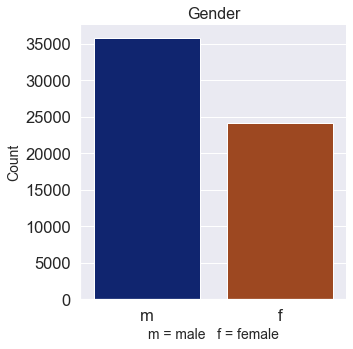

In [40]:
#shows the gender distribution of users in the dataset
#plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)
sns.catplot(x = "sex", kind = "count", data= df_eda, palette="dark")
plt.xlabel("m = male   f = female", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.title("Gender", fontsize = 16);

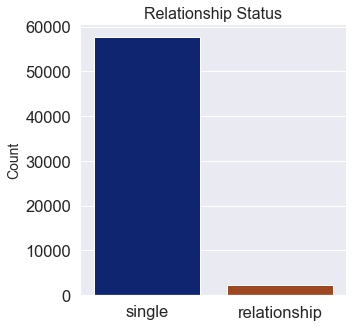

In [41]:
#shows the gender distribution of users in the dataset
#plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)
sns.catplot(x = "status", kind = "count", data= df_eda, palette="dark")
plt.xlabel("", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.title("Relationship Status", fontsize = 16);

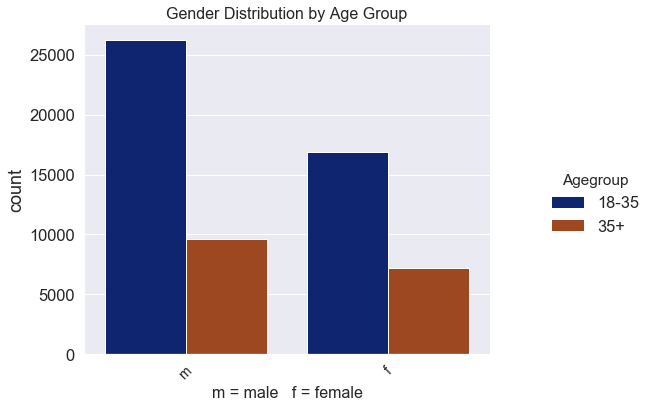

In [42]:
#shows the Gender distribution according to the age group
g = sns.catplot(x = "sex", hue = "Agegroup", kind= "count", data=df_eda, palette="dark")
g.set_xticklabels(rotation = 45, fontsize = 14)
g.fig.set_figwidth(10)
g.fig.set_figheight(6)
plt.xlabel("m = male   f = female", fontsize = 16);
plt.title("Gender Distribution by Age Group", fontsize = 16);


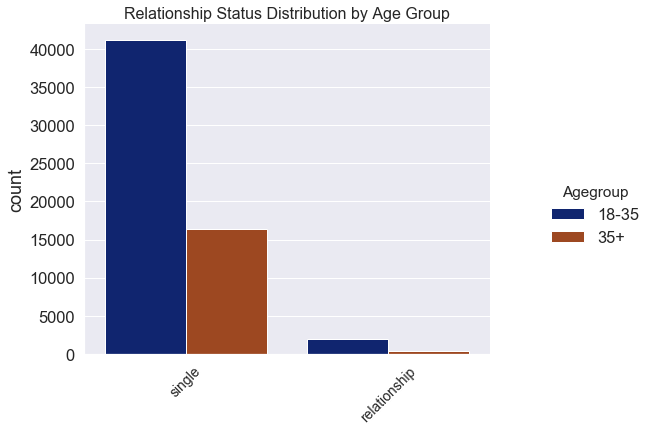

In [43]:
#shows the marital status distribution according to the age group
g = sns.catplot(x = "status", hue = "Agegroup", kind= "count", data=df_eda,palette="dark")
g.set_xticklabels(rotation = 45, fontsize = 14)
g.fig.set_figwidth(10)
g.fig.set_figheight(6)
plt.xlabel("", fontsize = 16);
plt.title("Relationship Status Distribution by Age Group", fontsize = 16);

In [44]:
df_eda["height"] =pd.qcut(df_eda['height'], 6)

Text(0.5, 1, 'Height')

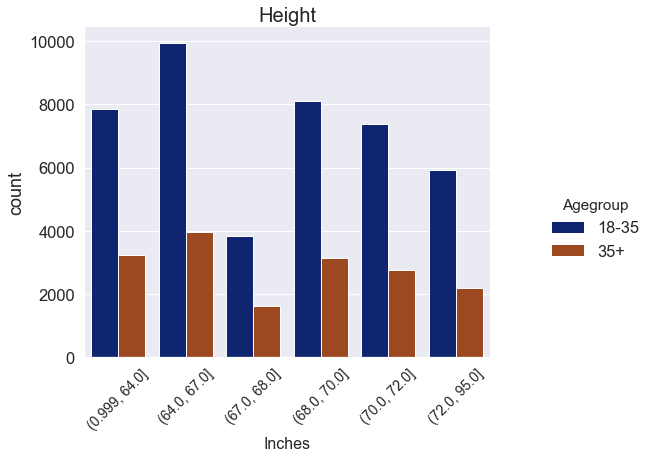

In [45]:
#shows the height distribution according to the age group
g = sns.catplot(x = "height", hue = "Agegroup", kind= "count", data=df_eda, palette="dark")
g.set_xticklabels(rotation = 45, fontsize = 14)
g.fig.set_figwidth(10)
g.fig.set_figheight(6)
plt.xlabel("Inches", fontsize = 16)
plt.title("Height", fontsize = 20)

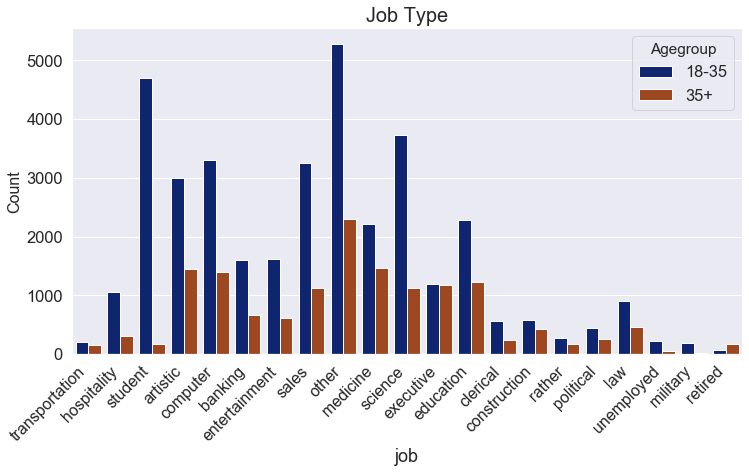

In [46]:
#shows the job type distribution according to the age group
fig= plt.subplots(figsize =(12,6))
g = sns.countplot(x ="job", hue ="Agegroup", 
                         data = df_eda, palette="dark")

g.set_xticklabels(g.get_xticklabels(),rotation = 45, fontsize = 16,  ha="right");

plt.ylabel("Count", fontsize = 16)
plt.title("Job Type", fontsize = 20);

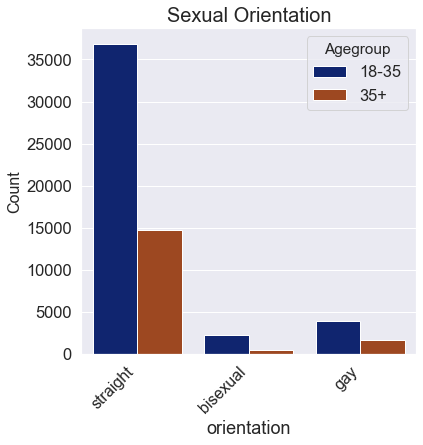

In [47]:
#shows the sexual orientation distribution according to the age group
fig= plt.subplots(figsize =(6,6))
g = sns.countplot(x ="orientation", hue ="Agegroup", 
                         data = df_eda, palette="dark")

g.set_xticklabels(g.get_xticklabels(),rotation = 45, fontsize = 16,  ha="right");

plt.ylabel("Count", fontsize = 16)
plt.title("Sexual Orientation", fontsize = 20);

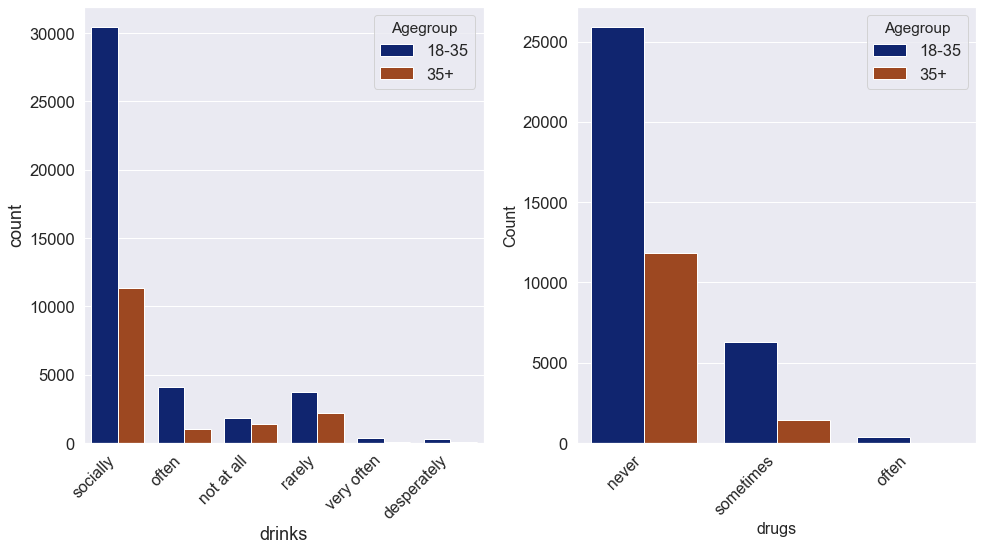

In [48]:
#create a function to shows the distribution of categoricals features

def eda(featerus):
    sns.set(font_scale=1.5)

    fig, axes = plt.subplots(nrows = 1, ncols= 2,figsize =(14,8))

    for xcol, ax in zip(featerus, axes):
        g = sns.countplot(x =xcol, hue ="Agegroup", 
                         data = df_eda, palette="dark", ax=ax)
        g.set_xticklabels(ax.get_xticklabels(),rotation = 45, fontsize = 16,  ha="right")
        plt.xlabel(xcol, fontsize = 16)
        plt.ylabel("Count", fontsize = 16)
        #plt.title(xcol, fontsize = 20)
        
    plt.tight_layout()
    plt.show()
            

eda(['drinks', 'drugs'])


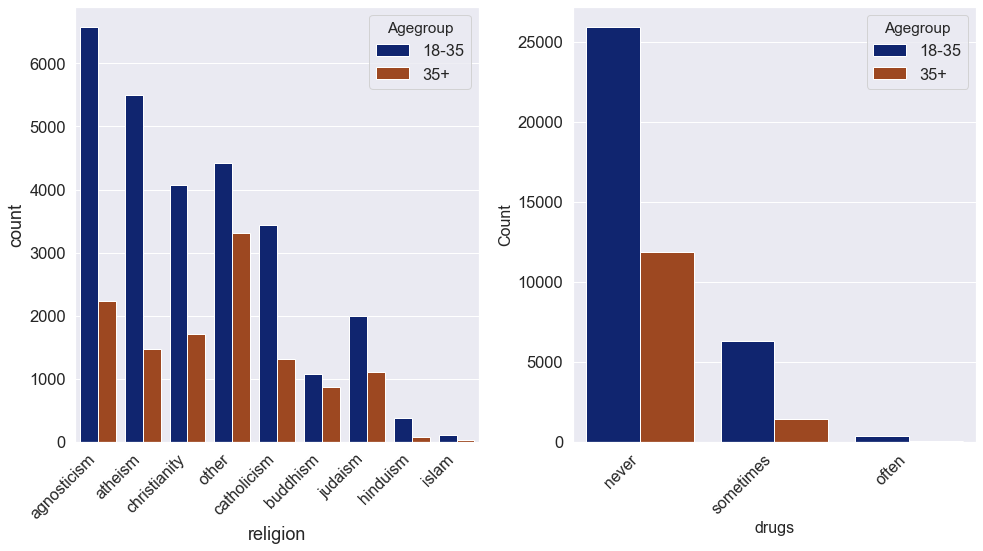

In [49]:
eda(['religion', 'drugs'])

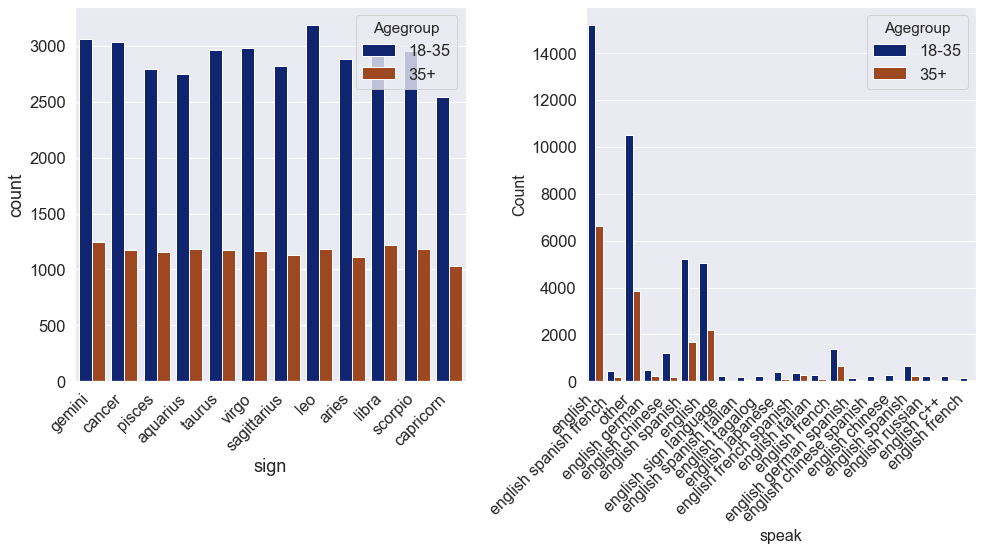

In [50]:
eda(['sign', 'speak'])

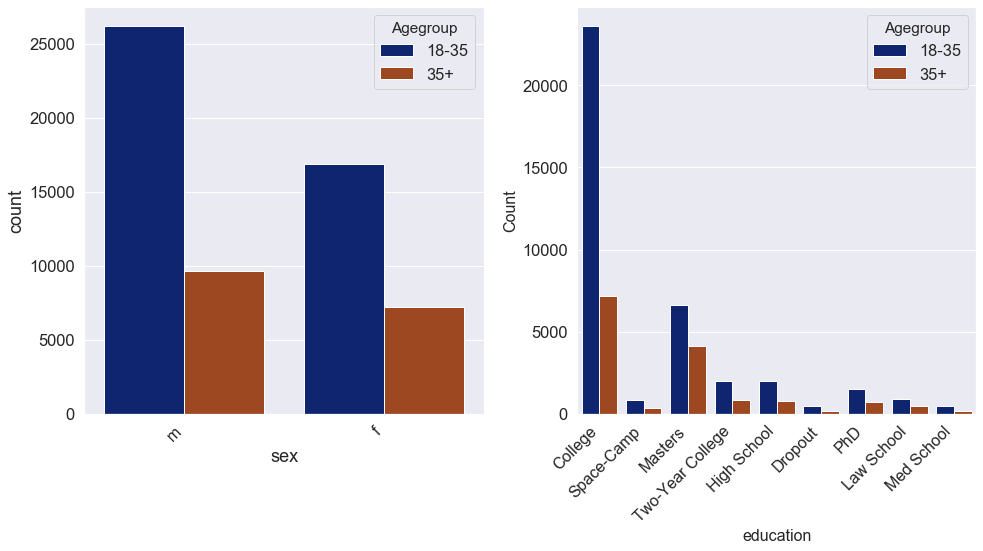

In [51]:
eda(['sex', 'education'])

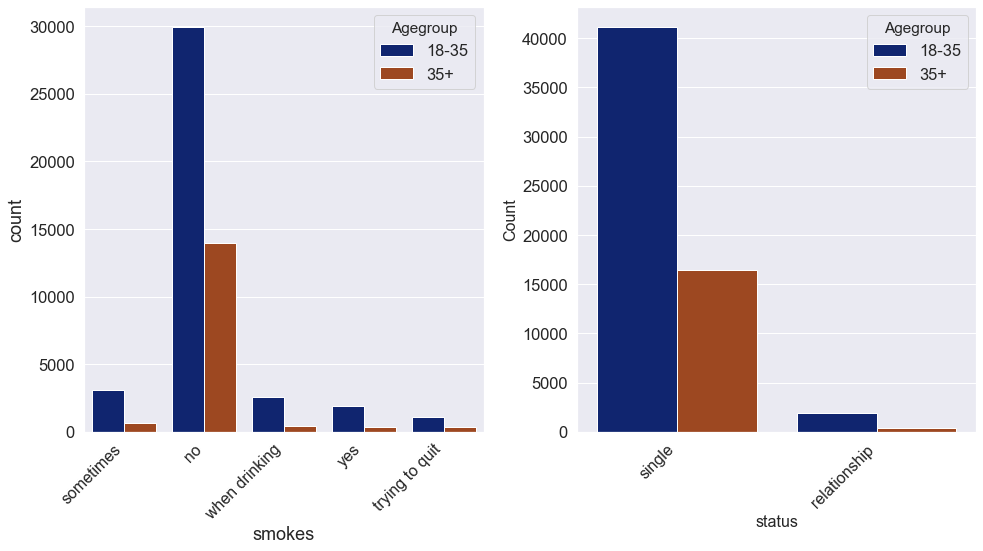

In [52]:
eda(['smokes', 'status'])

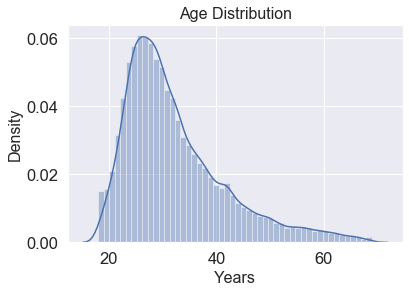

In [53]:
 sns.distplot(data["age"])

plt.ylabel("Density", fontsize = 16)
plt.xlabel("Years", fontsize = 16)
plt.title("Age Distribution", fontsize = 16);

In [54]:
#data.to_csv("eda_data.csv", index=False)